In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:>

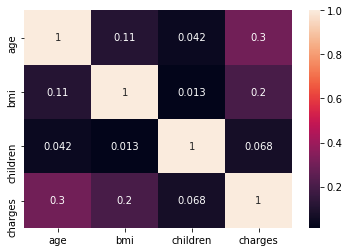

In [3]:
sns.heatmap(data.corr(), annot =True)

In [4]:
data_drop = data.drop("children",axis=1)
data_drop.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520


In [5]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1338 non-null   int64  
 1   sex      1338 non-null   object 
 2   bmi      1338 non-null   float64
 3   smoker   1338 non-null   object 
 4   region   1338 non-null   object 
 5   charges  1338 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 62.8+ KB


In [6]:
data_drop.smoker.map({"yes":1,"no":0})



0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

<AxesSubplot:xlabel='bmi', ylabel='charges'>

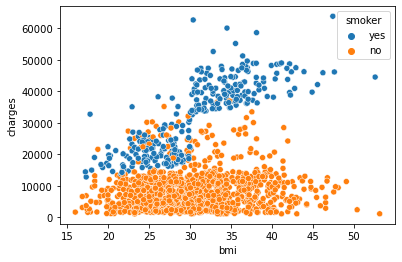

In [7]:
sns.scatterplot(x="bmi",y="charges", data = data_drop, hue="smoker" )

<AxesSubplot:xlabel='age', ylabel='charges'>

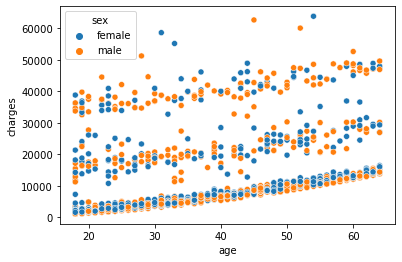

In [8]:
sns.scatterplot(x="age",y="charges", data = data_drop, hue="sex" )


In [9]:
data_drop = data_drop.drop("sex", axis=1)


In [10]:
data_drop.head()

,age,bmi,smoker,region,charges
0,19,27.900,yes,southwest,16884.92400
1,18,33.770,no,southeast,1725.55230
2,28,33.000,no,southeast,4449.46200
3,33,22.705,no,northwest,21984.47061
4,32,28.880,no,northwest,3866.85520


In [41]:
data_drop.loc[578,:]

age               52
bmi             30.2
smoker            no
region     southwest
charges      9724.53
Name: 578, dtype: object

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer



In [21]:
x = data_drop.drop("charges", axis=1)
y = data_drop["charges"]


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split
x_treino, x_teste,y_treino,y_teste = train_test_split(x,y,test_size = 0.2, random_state = 0)
x_teste

,age,bmi,smoker,region
578,52,30.200,no,southwest
610,47,29.370,no,southeast
569,48,40.565,yes,northwest
1034,61,38.380,no,northwest
198,51,18.050,no,northwest
...,...,...,...,...
1084,62,30.495,no,northwest
726,41,28.405,no,northwest
1132,57,40.280,no,northeast
725,30,39.050,yes,southeast


In [43]:
scalers = [MinMaxScaler(),MaxAbsScaler(),StandardScaler(),
          RobustScaler(),Normalizer(),QuantileTransformer(),PowerTransformer()]

In [44]:
import warnings
warnings.filterwarnings("ignore")
for  Scaler in scalers:
    pipe_num = Pipeline(steps=[
        ("norm", Scaler)])
    cat_transf = Pipeline(steps=[
        ("imputer", OneHotEncoder())
    ])
    preprocess = ColumnTransformer(transformers=[
        ("num",pipe_num,["bmi", "age"]),
        ("cat",cat_transf,["region","smoker"])
    ])
    pipe = Pipeline(steps=[
        ("preprocess",preprocess),
        ("Regressão",LinearRegression( ))
    ])
   
    pipe.fit(x_treino, y_treino)
    print(Scaler," ",pipe.score(x_treino, y_treino))

MinMaxScaler()   0.735096207107494
MaxAbsScaler()   0.735096207107494
StandardScaler()   0.735096207107494
RobustScaler()   0.735096207107494
Normalizer()   0.6452635831996398
QuantileTransformer()   0.7383518083780123
PowerTransformer()   0.7345760925411751


In [45]:
pipe_num = Pipeline(steps=[
("norm", QuantileTransformer())])
cat_transf = Pipeline(steps=[
("imputer", OneHotEncoder())
    ])
preprocess = ColumnTransformer(transformers=[
("num",pipe_num,["bmi", "age"]),
("cat",cat_transf,["region","smoker"])
    ])
pipe = Pipeline(steps=[
("preprocess",preprocess),
("Regressão",LinearRegression( ))
    ])
   
pipe.fit(x_treino, y_treino)
pipe.score(x_treino, y_treino)

0.7383518083780123

In [46]:

indices = x_teste.age
indices

578     52
610     47
569     48
1034    61
198     51
        ..
1084    62
726     41
1132    57
725     30
963     46
Name: age, Length: 268, dtype: int64

In [47]:
previsão = pipe.predict(x_teste)
data_prev = pd.DataFrame(previsão, index= y_teste.index)
pd.concat([data_prev,y_teste,indices], axis=1)

,0,charges,age
578,11289.086803,9724.53000,52
610,9445.478225,8547.69130,47
569,37842.062797,45702.02235,48
1034,16991.557259,12950.07120,61
198,7870.231499,9644.25250,51
...,...,...,...
1084,14256.373951,15019.76005,62
726,8083.372099,6664.68595,41
1132,16812.485347,20709.02034,57
725,32526.995390,40932.42950,30


In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_teste, previsão)

4085.1892157598013